<a href="https://colab.research.google.com/github/yashashwi-s/RLbook/blob/main/Cliff_Walking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(0)

In [2]:
# grid world related constants
GRID_HEIGHT = 4
GRID_WIDTH = 12

EPSILON = 0.1  # probability for exploration
ALPHA = 0.5   # step size
GAMMA = 1      # gamma for Q-Learning and SARSA

UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3
ACTIONS = [UP, DOWN, LEFT, RIGHT] # all possible actions

# initial state action pair values
START = [3, 0]
GOAL = [3, 11]

In [3]:
# required helper methods
def step(state, action):
  i, j = state
  if action == UP:
    next_state = [max(i - 1, 0), j]
  elif action == LEFT:
    next_state = [i, max(j - 1, 0)]
  elif action == RIGHT:
    next_state = [i, min(j + 1, GRID_WIDTH - 1)]
  elif action == DOWN:
    next_state = [min(i + 1, GRID_HEIGHT - 1), j]
  else:
    assert False

  reward = -1
  if (action == DOWN and i == 2 and 1 <= j <= 10) or (
    action == RIGHT and state == START):
    reward = -100
    next_state = START

  return next_state, reward

def epsilon_greedy(state, q_value):
  if np.random.binomial(1, EPSILON) == 1:
    return np.random.choice(ACTIONS)
  else:
    values_ = q_value[state[0], state[1], :]
    return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

In [4]:
def max_qval(q_value, state):
  qval = q_value[state[0], state[1], ACTIONS[0]]
  for action in ACTIONS:
    if(q_value[state[0], state[1], action]>qval):
      qval = q_value[state[0], state[1], action]
  return qval

In [5]:
def Q_learning(q_value):
  state = START
  rewards = 0.0
  while state != GOAL:
    action = epsilon_greedy(state, q_value)
    next_state, reward = step(state, action)
    rewards += reward

    q_value[state[0], state[1], action] += ALPHA*(reward + GAMMA * np.max(q_value[next_state[0], next_state[1], :]) - q_value[state[0], state[1], action])
    state = next_state
  return rewards

100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


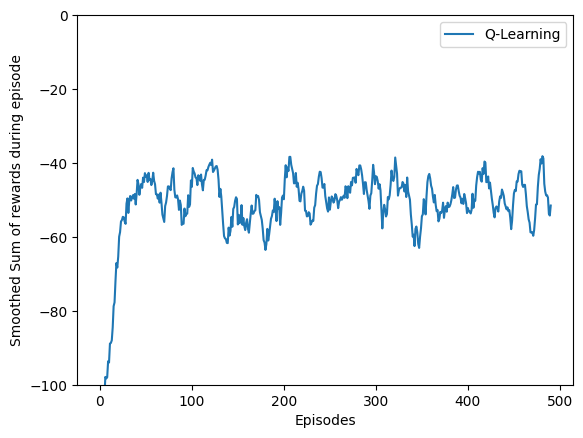

In [6]:
episodes = 500

window_size = 10

rewards_q_learning = np.zeros((20, episodes))

for i in tqdm(range(20)):
    q_q_learning = np.zeros((GRID_HEIGHT, GRID_WIDTH, 4))
    for j in range(episodes):
        rewards_q_learning[i, j] = Q_learning(q_q_learning)

smoothed_rewards_q_learning = np.zeros((20, episodes - window_size + 1))
for i in range(20):
    for j in range(episodes - window_size + 1):
        smoothed_rewards_q_learning[i, j] = np.mean(rewards_q_learning[i, j:j+window_size])

average_smoothed_rewards_q_learning = np.mean(smoothed_rewards_q_learning, axis=0)

plt.plot(average_smoothed_rewards_q_learning, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Smoothed Sum of rewards during episode')
plt.ylim([-100, 0])
plt.legend()
plt.show()

In [7]:
episodes = 100 # episodes of each run
rewards_q = np.zeros(episodes)
q_values = np.zeros((GRID_HEIGHT, GRID_WIDTH, 4))

for i in range(episodes):
    rewards_q[i] += Q_learning(q_values)

print(sum((rewards_q >= np.mean(rewards_q))))

75
